<a href="https://colab.research.google.com/github/viraaji/Data-Science-4Every1/blob/develop/DataScience_4EVery1_neural_network_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Testing data shape:  (10000, 28, 28)
Testing labels shape:  (10000,)


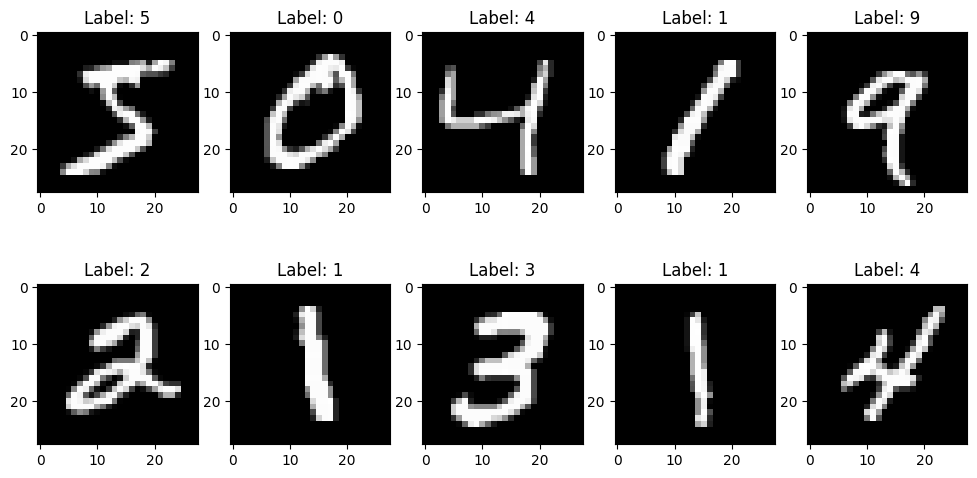

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import os

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shape of the training and testing data
print("Training data shape: ", X_train.shape) # (60000, 28, 28)
print("Training labels shape: ", y_train.shape) # (60000,)
print("Testing data shape: ", X_test.shape) # (10000, 28, 28)
print("Testing labels shape: ", y_test.shape) # (10000,)

# Visualize some examples from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title("Label: {}".format(y_train[i]))
plt.show()


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2672 - accuracy: 0.9235 - val_loss: 0.1372 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1173 - accuracy: 0.9653 - val_loss: 0.1092 - val_accuracy: 0.9690
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0814 - accuracy: 0.9751 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0907 - val_accuracy: 0.9709
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0752 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0739 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0291 - accuracy: 0.9916 - val_loss: 0.0837 - val_acc

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from sklearn.metrics import accuracy_score

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)
test_dataset = MNIST(root='data/', train=False, transform=ToTensor(), download=True)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_pytorch = Net().to(device)

# Define the loss function, optimizer, and evaluation metric
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)






100%|██████████| 9912422/9912422 [00:00<00:00, 148505898.14it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28903768.51it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33361913.93it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11752331.13it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
def train(model_pytorch):
    for epoch in range(10):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model_pytorch(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
    return model_pytorch     

In [ ]:
model_pytorch = train(model_pytorch)

Epoch: 0 [0/60000 (0%)]	Loss: 2.271872
Epoch: 0 [3200/60000 (5%)]	Loss: 0.413832
Epoch: 0 [6400/60000 (11%)]	Loss: 0.686479
Epoch: 0 [9600/60000 (16%)]	Loss: 0.293724
Epoch: 0 [12800/60000 (21%)]	Loss: 0.241269
Epoch: 0 [16000/60000 (27%)]	Loss: 0.519075
Epoch: 0 [19200/60000 (32%)]	Loss: 0.203205
Epoch: 0 [22400/60000 (37%)]	Loss: 0.294024
Epoch: 0 [25600/60000 (43%)]	Loss: 0.210935
Epoch: 0 [28800/60000 (48%)]	Loss: 0.539604
Epoch: 0 [32000/60000 (53%)]	Loss: 0.354437
Epoch: 0 [35200/60000 (59%)]	Loss: 0.315527
Epoch: 0 [38400/60000 (64%)]	Loss: 0.050244
Epoch: 0 [41600/60000 (69%)]	Loss: 0.086236
Epoch: 0 [44800/60000 (75%)]	Loss: 0.361484
Epoch: 0 [48000/60000 (80%)]	Loss: 0.454665
Epoch: 0 [51200/60000 (85%)]	Loss: 0.077826
Epoch: 0 [54400/60000 (91%)]	Loss: 0.149504
Epoch: 0 [57600/60000 (96%)]	Loss: 0.422001
Epoch: 1 [0/60000 (0%)]	Loss: 0.257920
Epoch: 1 [3200/60000 (5%)]	Loss: 0.190629
Epoch: 1 [6400/60000 (11%)]	Loss: 0.018342
Epoch: 1 [9600/60000 (16%)]	Loss: 0.214661
Epoch:

In [ ]:
def test(model_pytorch):
        # Evaluate the model on the test set
    model_pytorch.eval()
    test_loss = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model_pytorch(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            y_true.extend(target.cpu().numpy())
            y_pred.extend(pred.cpu().numpy().flatten())
    test_loss /= len(test_loader)
    test_acc = accuracy_score(y_true, y_pred)
    print('Test set: Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(
        test_loss, 100. * test_acc))

In [ ]:
test(model_pytorch)

Test set: Average loss: 0.0763, Accuracy: 98.08%



In [ ]:
model_pytorch.train()

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
model_pytorch

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
def printWnb(model):
    
    # print the weights and biases of each layer
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.data)

In [ ]:
printWnb(model_pytorch)

linear1.weight tensor([[ 0.0043, -0.0006,  0.0333,  ...,  0.0153,  0.0182,  0.0325],
        [ 0.0190, -0.0040, -0.0301,  ..., -0.0273,  0.0283, -0.0005],
        [ 0.0174, -0.0073,  0.0089,  ...,  0.0141,  0.0333,  0.0303],
        ...,
        [-0.0297, -0.0228, -0.0293,  ..., -0.0078,  0.0228,  0.0289],
        [-0.0011,  0.0294, -0.0110,  ...,  0.0356,  0.0294,  0.0008],
        [-0.0099, -0.0118,  0.0097,  ..., -0.0175,  0.0310,  0.0327]])
linear1.bias tensor([ 0.2424,  0.2458, -0.2133,  0.1304, -0.0569,  0.0393, -0.0664, -0.1437,
         0.0227, -0.0321,  0.0740,  0.0942, -0.0802, -0.0300, -0.0350,  0.2278,
        -0.0735,  0.1122, -0.2066, -0.0826, -0.1059, -0.0217,  0.0855, -0.1763,
         0.1094,  0.2851,  0.1237,  0.0302,  0.1036, -0.0394, -0.0493, -0.2191,
        -0.0301, -0.2286, -0.1634,  0.2883, -0.1153, -0.0558, -0.0150,  0.0557,
         0.0695,  0.1495,  0.1305, -0.0202,  0.0931,  0.0610, -0.0653, -0.0275,
        -0.0511, -0.0575,  0.0658,  0.0838,  0.0074,  0.38

In [ ]:

quantized_model_dynamic = torch.quantization.quantize_dynamic(model_pytorch, {nn.Conv2d, nn.Linear}, dtype=torch.qint8)




In [ ]:
printWnb(quantized_model_dynamic)

In [ ]:
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    print('Size (MB):', os.path.getsize("temp.p")/1e6)
    os.remove('temp.p')




In [ ]:
print_size_of_model(model_pytorch)

Size (MB): 0.408525


In [ ]:
print_size_of_model(quantized_model_dynamic)

Size (MB): 0.105009


In [ ]:

# Print the named parameters of the model
for name, param in quantized_model_dynamic.named_parameters():
    print(name, param)


In [ ]:
test(quantized_model_dynamic)

Test set: Average loss: 0.0767, Accuracy: 98.06%



In [ ]:
test(model_pytorch)

Test set: Average loss: 0.0763, Accuracy: 98.08%



In [ ]:
import torch
import torchvision.models as models

# Load a pre-trained model
#model = models.resnet18(pretrained=True)

# Check if the model has learnable parameters
params = list(model_pytorch.parameters())
if len(params) == 0:
    print("Model does not have any learnable parameters")
else:
    print("Model has learnable parameters")


Model has learnable parameters


In [ ]:
import torch
import torchvision.models as models


# Check if the model has learnable parameters
params = list(quantized_model_dynamic.parameters())
if len(params) == 0:
    print("Model does not have any learnable parameters")
else:
    print("Model has learnable parameters")

Model does not have any learnable parameters
